Name - Yash Malviya

Designation - Data Analytics Internship @Oasis Infobyte

Task - Task 3 , Level 1 , Cleaning Data

Date - 28/07/2024

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
#Reading the data
data = pd.read_csv('AB_NYC_2019.csv')

#Taking a look at the top 5 rows of the data
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Looking for any missing values
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

2.Missing Data Handling

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
#Check for Missing Values
missing_values = df.isnull().sum()
print(missing_values)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
#Handling Missing Values:
df.dropna(inplace=True)

In [ ]:
#Checking Column Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Assessing unique values
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

3.Identify Duplicates

In [ ]:
# Identify duplicate rows
duplicates = df.duplicated()
print(duplicates.sum())


0


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [ ]:
# Verify if duplicates have been removed
duplicates = df.duplicated()
print(duplicates.sum())  # Should print 0 if all duplicates are removed


0


Standardization

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Standardize data types
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['price'] = df['price'].astype(float)
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['reviews_per_month'] = df['reviews_per_month'].astype(float)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)

# Handle missing values (example: fill with mean for simplicity)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

# Standardize text data
df['name'] = df['name'].str.lower().str.strip()
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower().str.strip()
df['neighbourhood'] = df['neighbourhood'].str.lower().str.strip()
df['room_type'] = df['room_type'].str.lower().str.strip()

# Normalize numeric data
scaler = StandardScaler()
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']] = scaler.fit_transform(
    df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']])

# Save the standardized dataset
df.to_csv('AB_NYC_2019.csv', index=False)


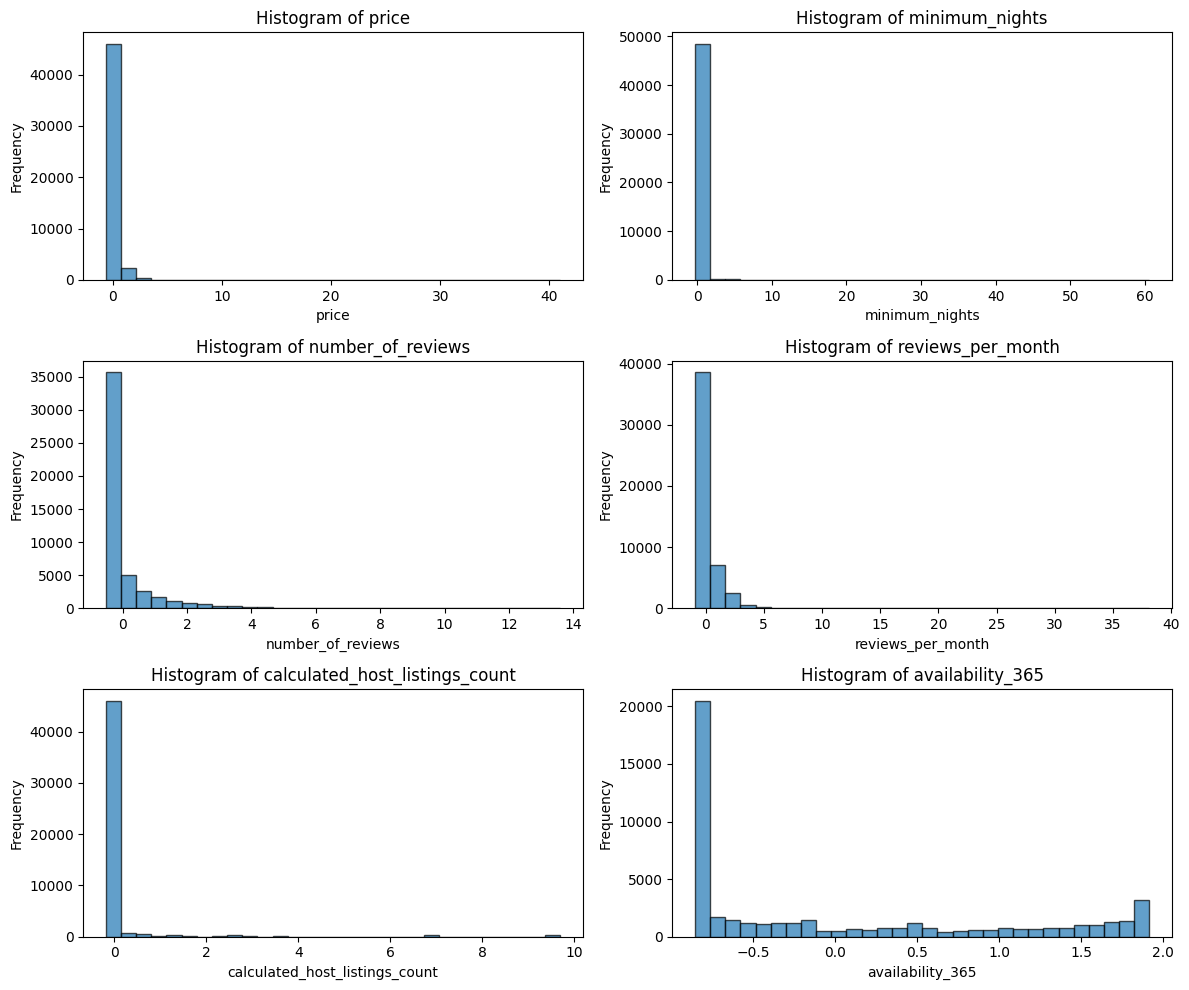

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the standardized dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Define columns to plot
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Create histograms
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


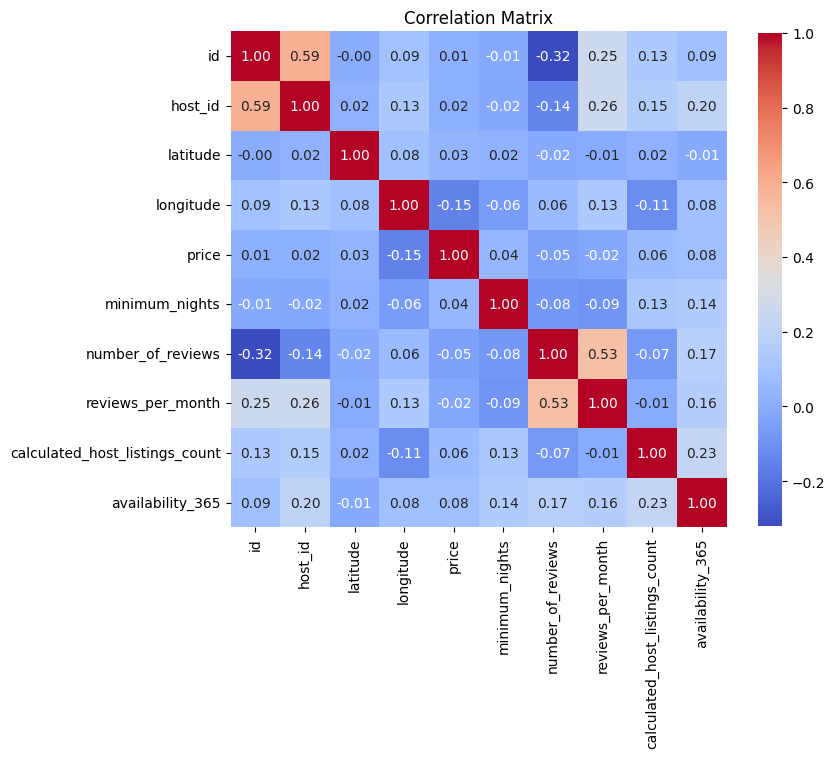

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the standardized dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Function to plot the correlation matrix
def plotCorrelationMatrix(df, size=8):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])
    plt.figure(figsize=(size, size))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title('Correlation Matrix')
    plt.show()

# Plot the correlation matrix
plotCorrelationMatrix(df, 8)


5.Outliers Detection

Number of outliers removed: 4427
Boxplots for Original Data:


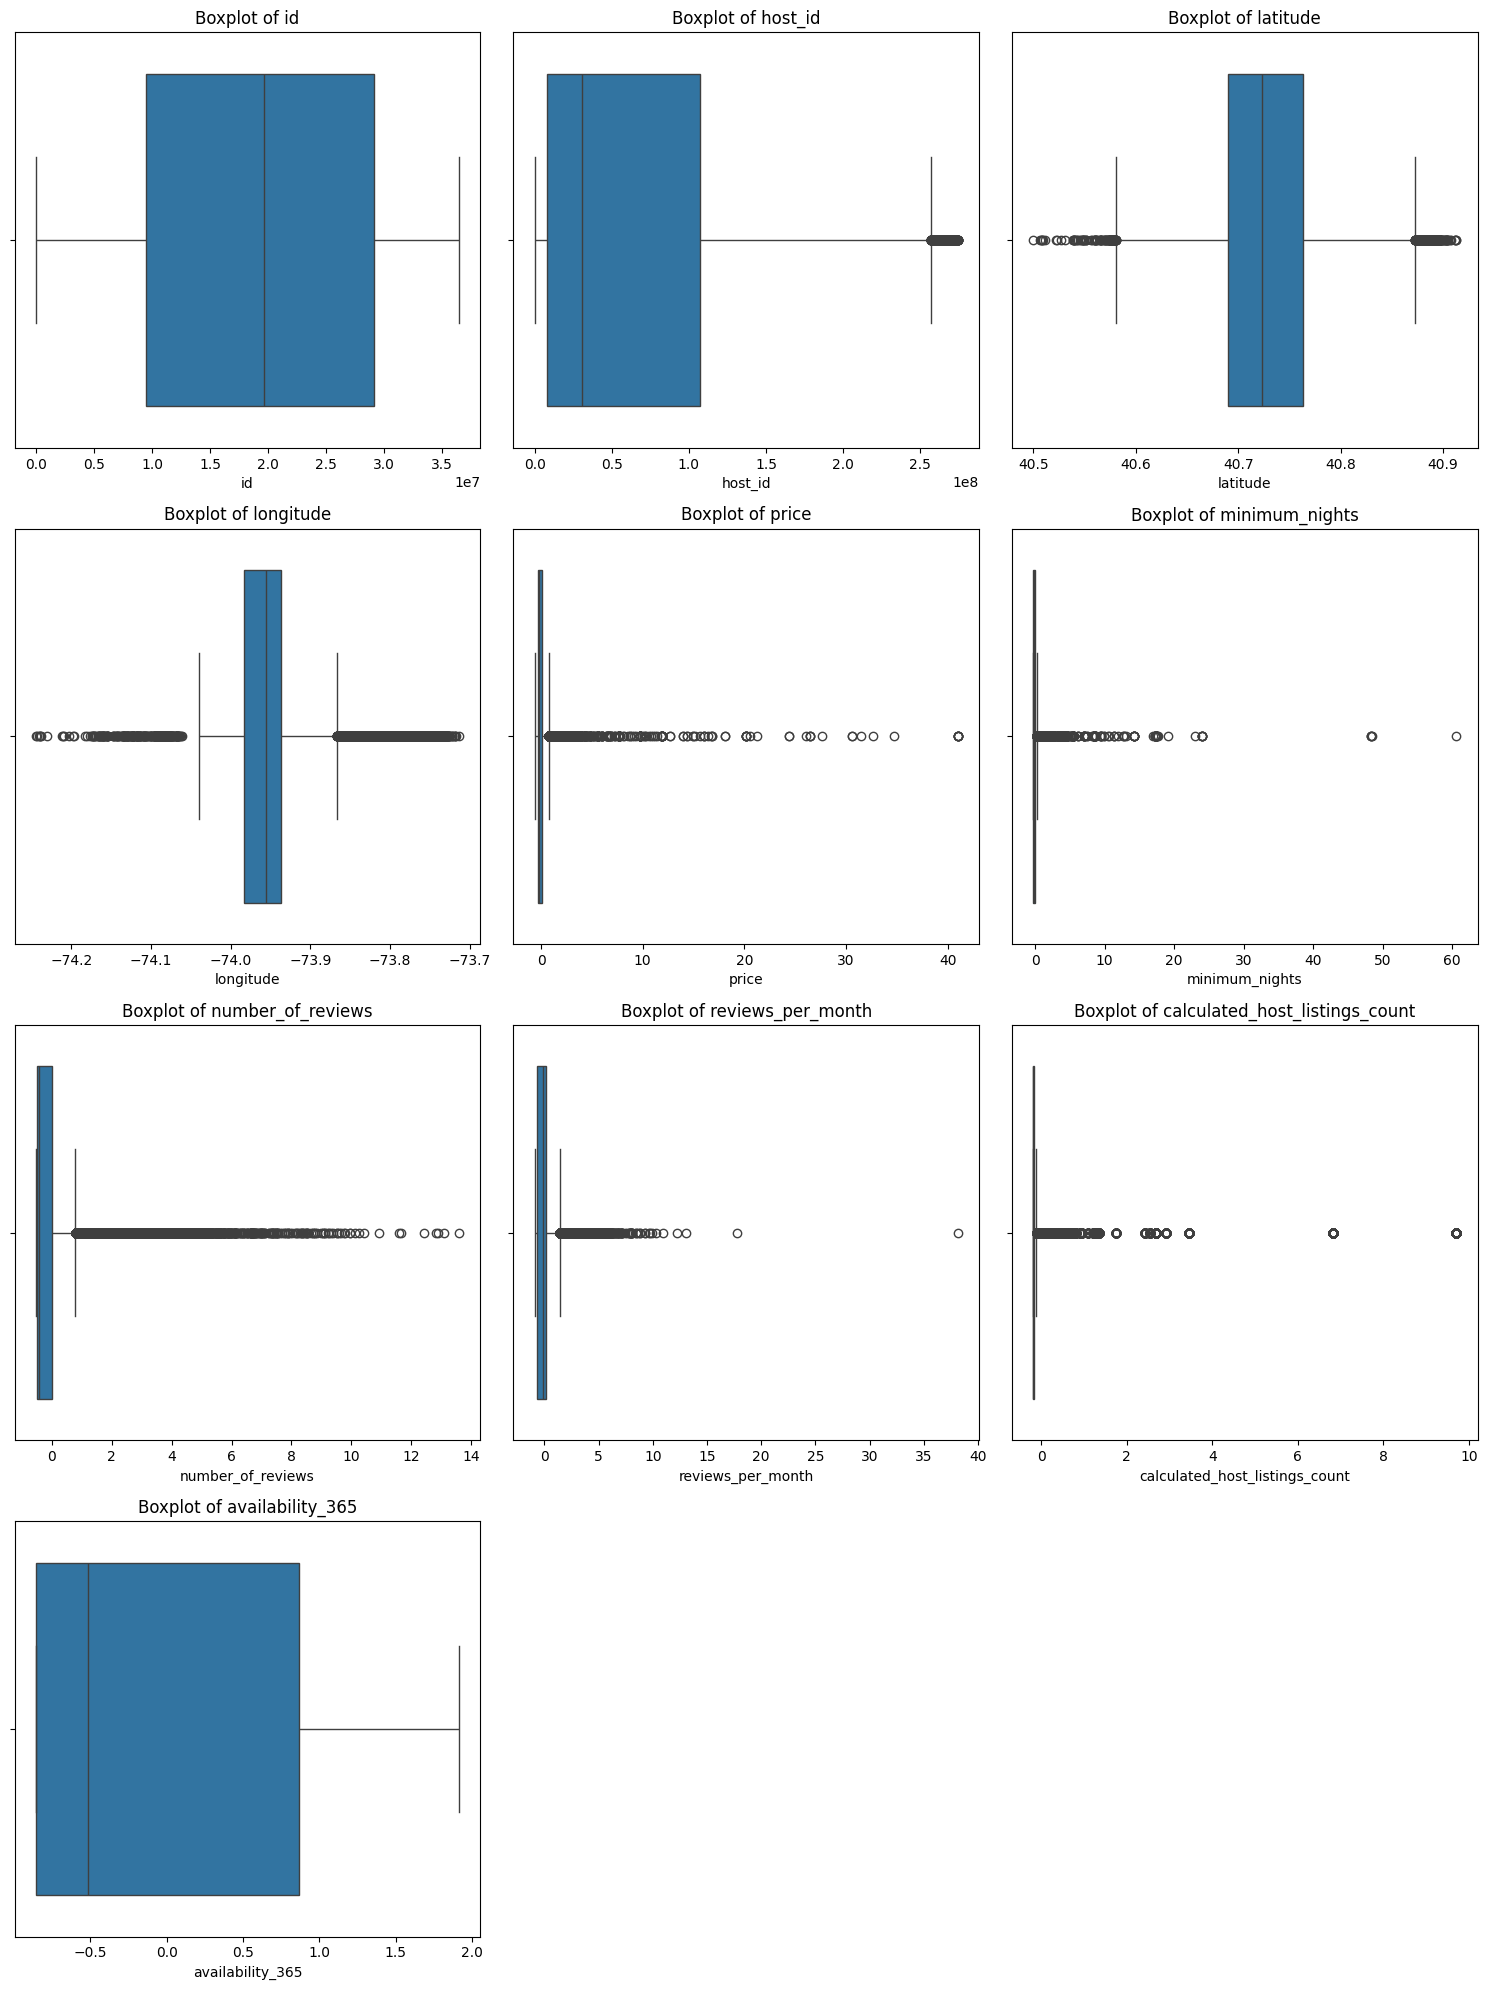

Boxplots for Data without Outliers:


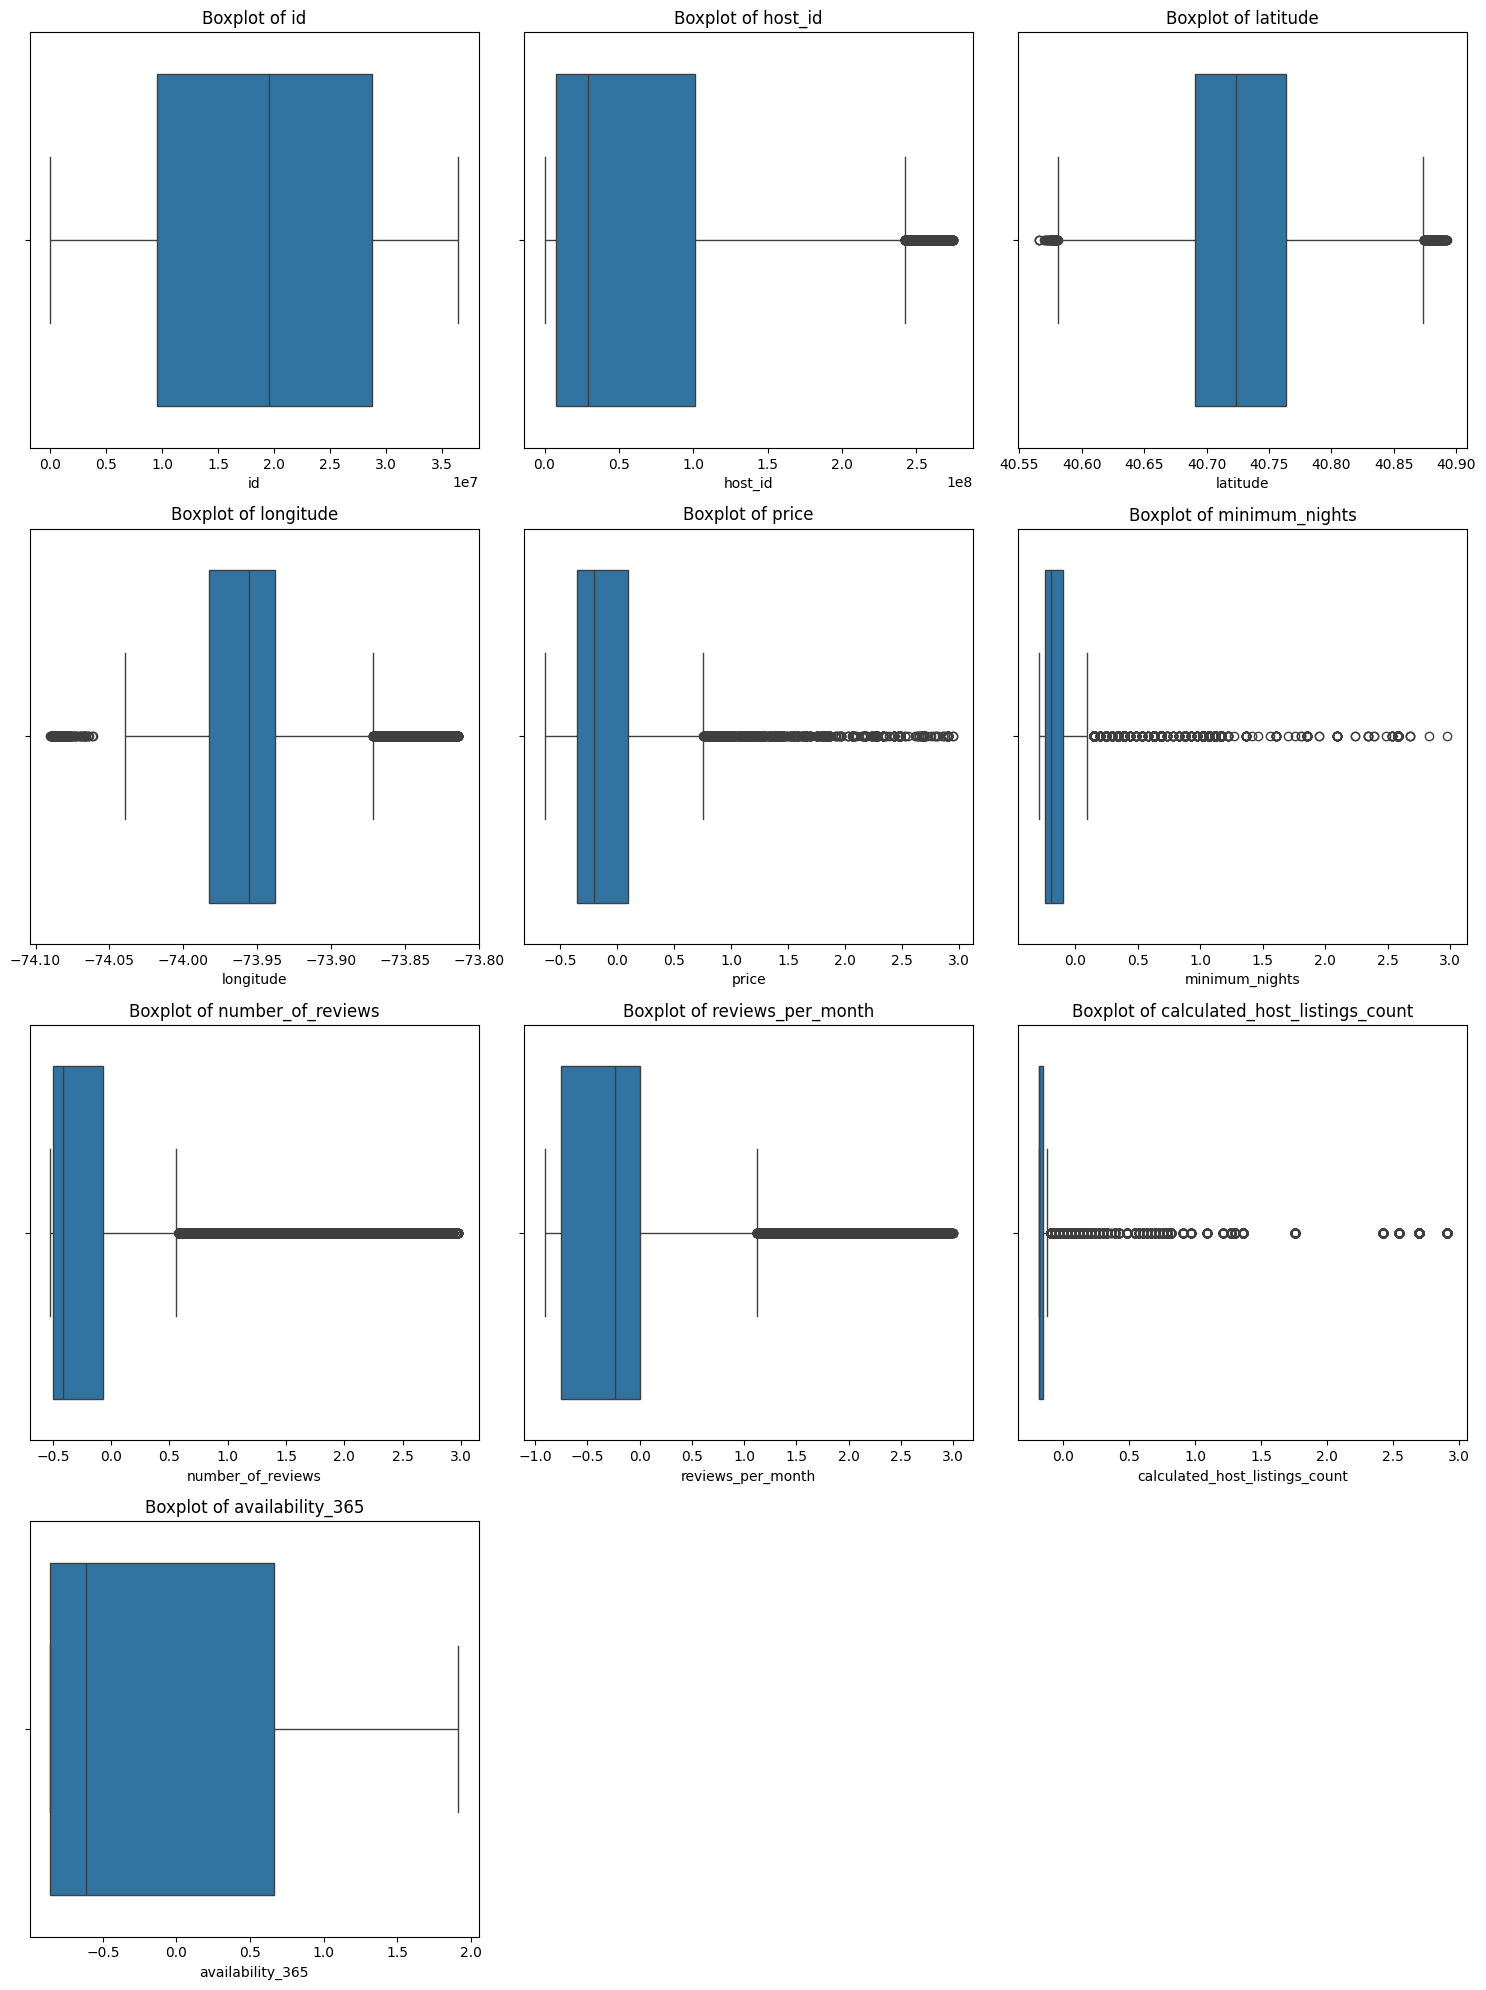

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Function to identify and handle outliers
def detect_and_handle_outliers(df):
    numeric_df = df.select_dtypes(include=[np.number])

    # Z-Score method
    z_scores = np.abs(stats.zscore(numeric_df))
    outliers = (z_scores > 3)

    # Create a new DataFrame without outliers
    df_no_outliers = df[(outliers == False).all(axis=1)]

    print("Number of outliers removed:", df.shape[0] - df_no_outliers.shape[0])

    return df_no_outliers

# Detect and handle outliers
df_no_outliers = detect_and_handle_outliers(df)

# Visualizing outliers using boxplots
def plot_boxplots(df):
    numeric_df = df.select_dtypes(include=[np.number])
    num_columns = len(numeric_df.columns)
    num_rows = (num_columns // 3) + 1

    plt.figure(figsize=(15, 5 * num_rows))
    for i, column in enumerate(numeric_df.columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

# Plot boxplots for original and cleaned data
print("Boxplots for Original Data:")
plot_boxplots(df)
print("Boxplots for Data without Outliers:")
plot_boxplots(df_no_outliers)

# Save the dataset without outliers
df_no_outliers.to_csv('AB_NYC_2019.csv', index=False)
